## Linear Regression Project
I am investigating a mock ecommerce dataset to determine what factors contribute to increased yearly spending by customers. The  data set provides information on customer purchases from a the mock company. The company offers in-store and online purchases and wishes to find out wheter customer time spent on the website or the app has more weight in yearly spending.

Columns of Interest:
* Avg. Session Length - Customer time spent in-store
* Time on App - Customer time spent viewing the app
* Time on Website - Customer time spent viewing the website
* Length of Membership - Length of Customer Membership
* Yearly Amount Spent - Yearly amount s pent by the customer

***The dataset is obtained from Pieran Data through their Udemy Course and all the information on the dataset (credit card #,emails etc are not real). I do not own any copyright on the dataset and am simply using for my project***

In [7]:
import pandas as pd
import numpy as np

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
%matplotlib inline

In [ ]:
# %cd - change directory to the file's path
# %pwd - check directory

In [20]:
%cd "C:\Users\Mert\Desktop\Portfolio Projects"

C:\Users\Mert\Desktop\Portfolio Projects


In [21]:
customers= pd.read_csv(r"Ecommerce_Customers.csv") # If directory is different can write the full path e.g. "C:\Users\Name\Desktop\File\Ecommerce_Customers.csv"

### Data Cleaning and Exploration

#### Checking the customers dataset head, info and column names.

In [22]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [23]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [24]:
#data set column names
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

#### Looking for any relationships between the columns 

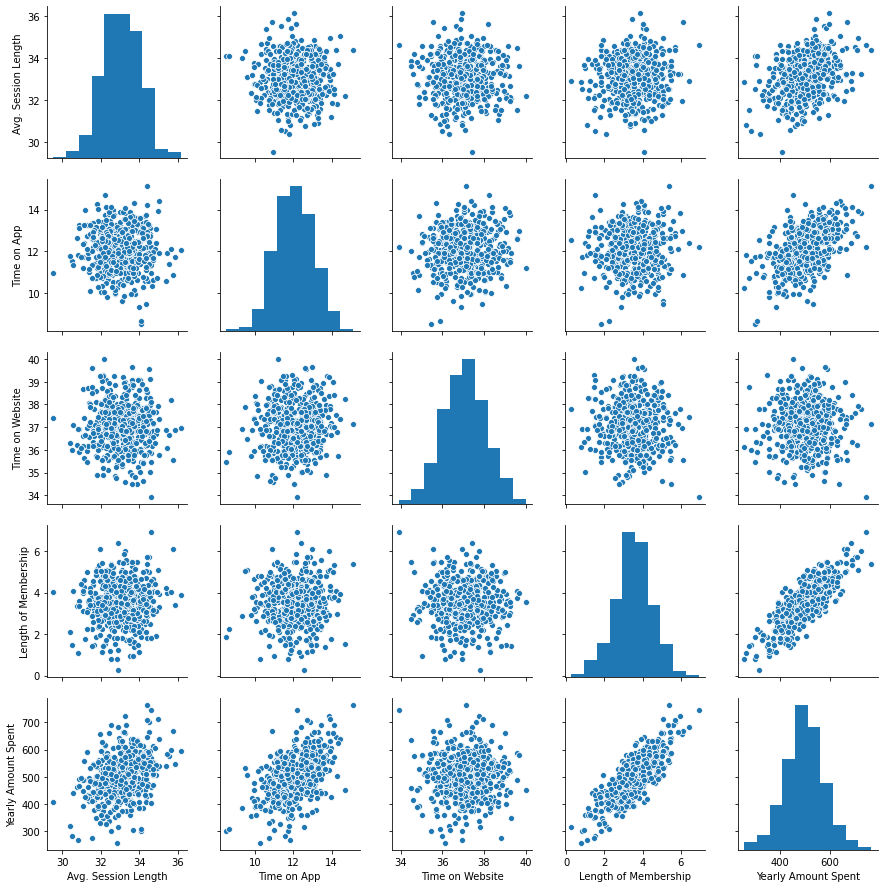

In [25]:
#looking at relationships
sns.pairplot(customers)

It seems like length of membership has a strong positive relationship with yearly amount spend. From the plots above, it is hard to determine whether both time on app and website has a positive effect on custoemr yearly expenditure. 


##### Looking at the Time Spent on Website  vs  App effect on Yearly Amount Spent

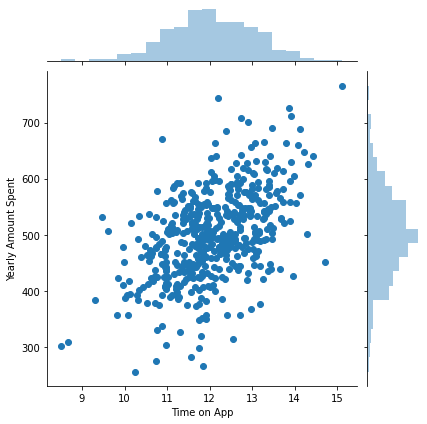

In [26]:
sns.jointplot(data = customers, x = 'Time on App', y='Yearly Amount Spent')

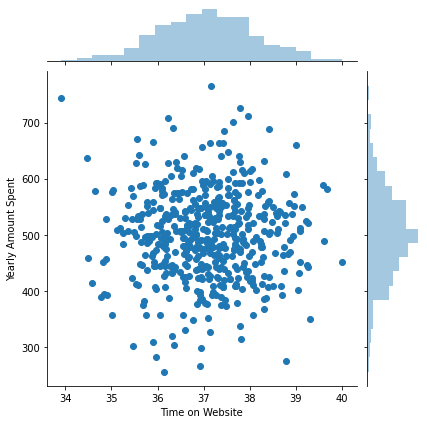

In [27]:
sns.jointplot(data = customers, x = 'Time on Website', y='Yearly Amount Spent')

The distributions of the two columns seems normal. It seems like the mobile app may have more of an impact on yearly amount spent in comparison to the website, but if so is very minimal. It is also noteworthy to look at the relationships between Length of Membership and Time Spent on Website and App beofre building the model.

##### Looking at Time on Website and App effects on Length of Membership to determine 

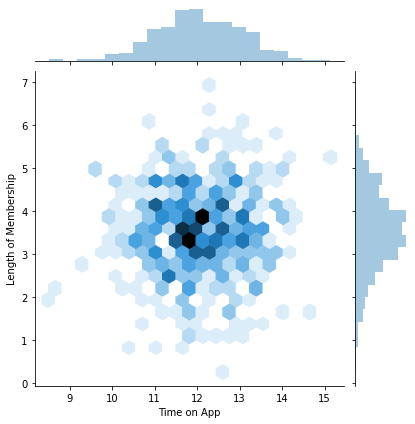

In [28]:
sns.jointplot(data = customers, x = 'Time on App', y='Length of Membership', kind = 'hex')

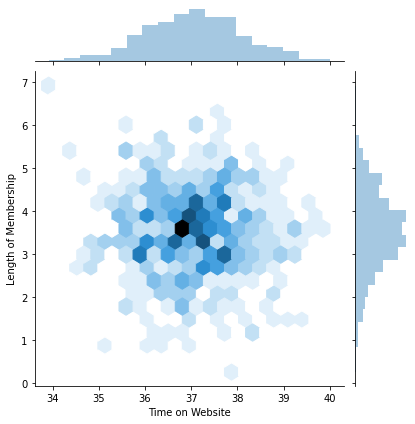

In [29]:
sns.jointplot(data = customers, x = 'Time on Website', y='Length of Membership', kind = 'hex')

We can see that the mobile app may have a little bit more influence of the length of membership  but in general there seems to be no clear correlation between time on website or app and length of membership.

#### Let's take a look athte correlation map to get a clearer idea of the relationships between the columns

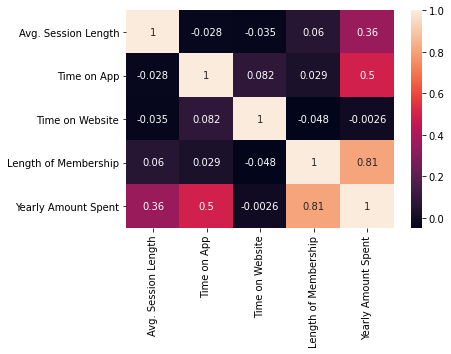

In [30]:
sns.heatmap(customers.corr(), annot=True)

The correlation matrix confirms the positive releationship between length of membership and yearly amount spent, in addition to showing little to no correlation between time on app or website and length of membership. We can also see a clear positive relationship between Time spent on App and Yearly Amount Spent.

## Let's build the linear models

### Model training 

###### Target variable is Yearly Amount Spent
###### Predictors are 
* 'Avg. Session Length' 
* 'Time on App'
* 'Time on Website'
* 'Length of Membership'

In [31]:
x = customers[['Avg. Session Length', 'Time on App',
       'Time on Website','Length of Membership']]

In [32]:
y = customers['Yearly Amount Spent']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 101)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
#Creating the linear regression model
lm1 = LinearRegression()

In [37]:
#Training the linear model
lm1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predictions and Model Evaluation

In [38]:
predictions = lm1.predict(X_test)

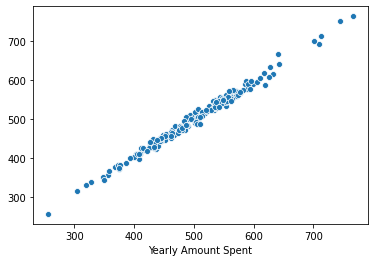

In [39]:
sns.scatterplot(y_test,predictions)

In [40]:
from sklearn import metrics

In [41]:
print(f"MAE: {metrics.mean_absolute_error(y_test,predictions)}\nMSE: {metrics.mean_squared_error(y_test,predictions)}\nRMSE: {np.sqrt(metrics.mean_absolute_error(y_test,predictions))}\nR2: {metrics.r2_score(y_test,predictions)}")

MAE: 7.2945465883313165
MSE: 81.90726984520929
RMSE: 2.700841829565611
R2: 0.9881986605164929


#This seems like a great liner regression model with a good R2-score. 

#### Confirming the lack if relationship between Time on App and Website before looking at Regression Summary

In [42]:
lm2= LinearRegression()

#### Assigining Length of Membership as the target variable and Time on App and Website as the predictors and training the lieanr regression model

In [43]:
x2 = customers[['Time on App','Time on Website','Avg. Session Length']]
y2 = customers['Length of Membership']

In [44]:
X_train,X_test,y_train,y_test = train_test_split (x2,y2,test_size = 0.33, random_state = 101)

In [45]:
lm2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
predictions = lm2.predict(X_test)

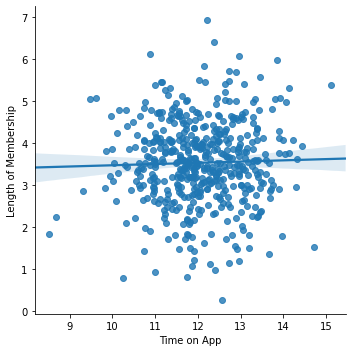

In [47]:
sns.lmplot(x= 'Time on App', y= 'Length of Membership',data = customers)

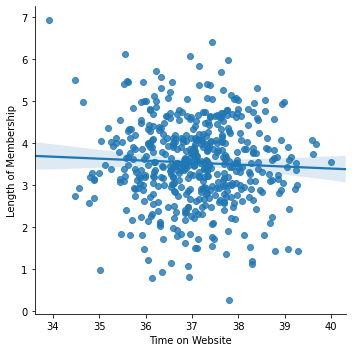

In [48]:
sns.lmplot(x= 'Time on Website', y= 'Length of Membership',data = customers)

In [49]:
print(f"MAE: {metrics.mean_absolute_error(y_test,predictions)}\nMSE: {metrics.mean_squared_error(y_test,predictions)}\nRMSE: {np.sqrt(metrics.mean_absolute_error(y_test,predictions))}\nR2: {metrics.r2_score(y_test,predictions)}")

MAE: 0.7710966233523582
MSE: 1.0343944628048432
RMSE: 0.8781210755655271
R2: 0.0009701451872127231


 We can see that both time on website and time on app have neglible effects on length of membership 
 and our model is not able to predict the target variable with our predictors accurately. This means that we can finally look at the summary of the first model to investigate the weights of the variables on yearly amount spent|

#### Looking at the coefficients and the intercept of our first model

In [50]:
lm1.intercept_

-1047.975964821279

In [51]:
pd.DataFrame(lm1.coef_,x.columns,columns=['Coefficients'])

,Coefficients
Avg. Session Length,25.912259
Time on App,38.508126
Time on Website,0.288716
Length of Membership,61.161610


The coefficients show us that per unit change, as suspected, length of membership has the highest impact with 61.16 followed by Time on app with 38.5 with Time on Website being less than 1 having pretty much no wesight on yearly spending.


To finally answer the question it seems like length of membership has the highest impact on yearly customer spending.The time customers spend on the app is the second best to that, whereas the time spent on the website has a neglible effect on yearly spending. It might be a good idea to improve the website upto minimal industry standard to not lose any customers that do not use apps, but given that the website has almost no effect on yearly spending the company could put most of their resources on developing the app past the competition and capitalize on gaining and retatining consumers through the App. They could link their app and have instructions on how to get and use the app on their website so that the the customers will be guided to the successful platform. 